# IVV

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
az.style.use('arviz-darkgrid')
import yfinance as yf

In [210]:
df_ivv = yf.download('IVV', start='2014-11-20', end='2024-11-20')

[*********************100%***********************]  1 of 1 completed


In [211]:
price = df_ivv['Adj Close']
sub = price - price.shift(1)
sub = sub.dropna()
log_price = np.log(price)
log_sub = log_price - log_price.shift(1)
log_sub = log_sub.dropna()


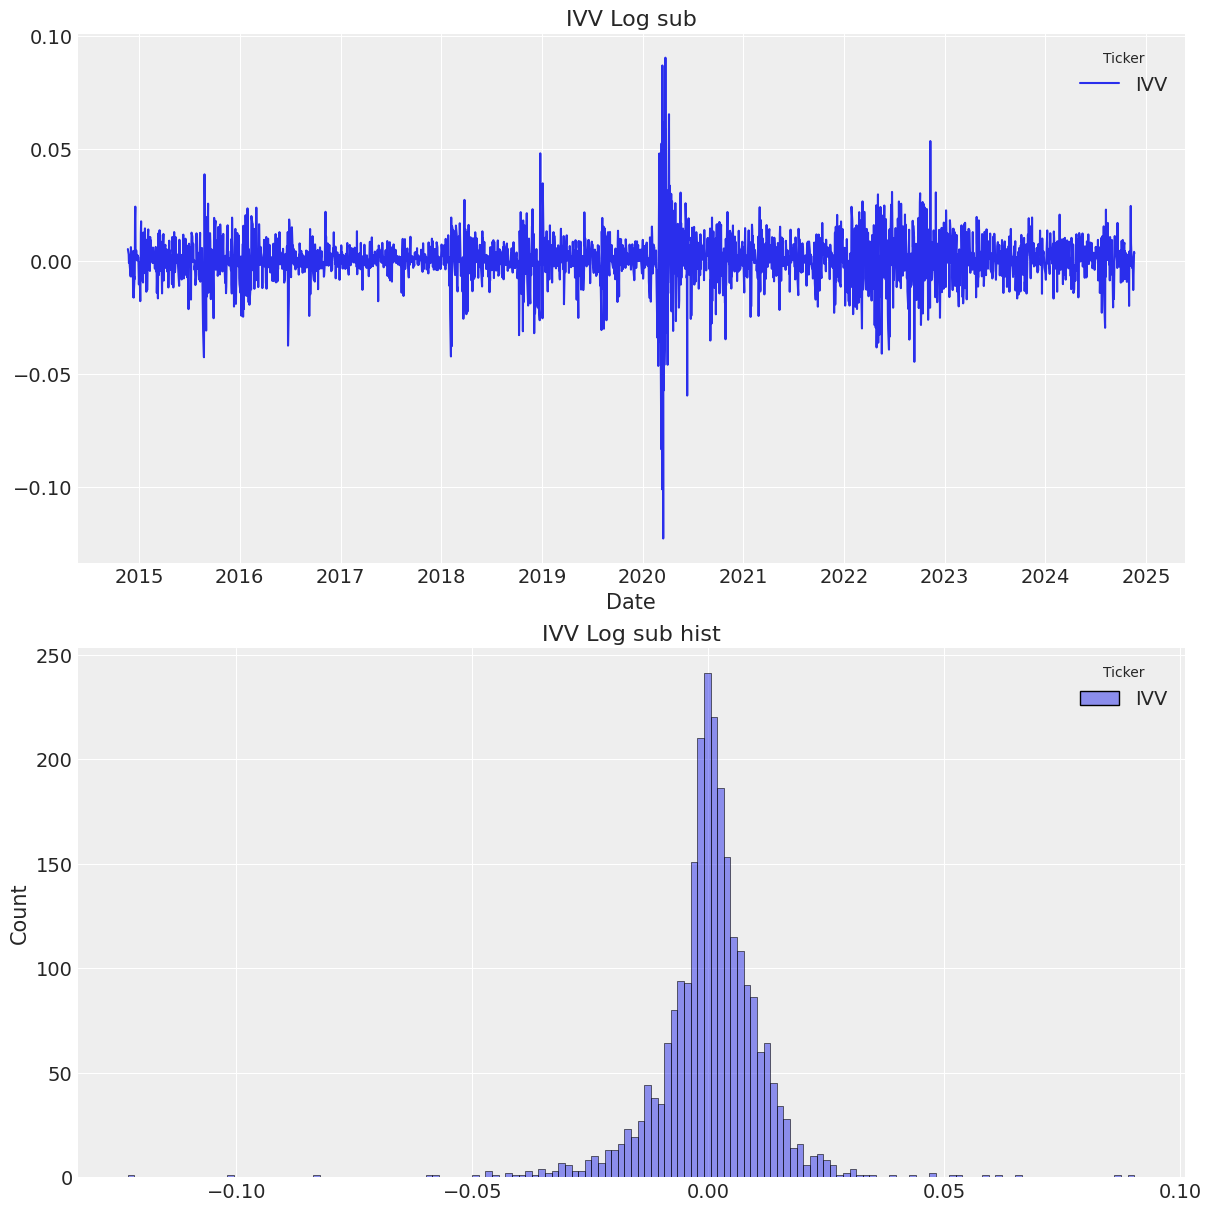

In [212]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.lineplot(log_sub)
plt.title('IVV Log sub')

plt.subplot(2, 1, 2)
sns.histplot(log_sub)
plt.title('IVV Log sub hist')

plt.show()

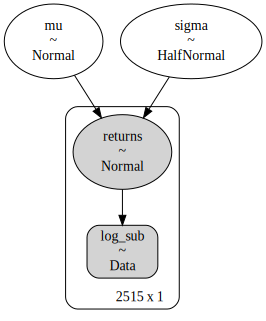

In [213]:
with pm.Model() as normal:
    log_sub_data = pm.Data('log_sub', log_sub)

    mu = pm.Normal('mu', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    returns = pm.Normal('returns', mu=mu, sigma=sigma, observed=log_sub_data)

pm.model_to_graphviz(normal)

In [214]:
with normal:
    trace_normal = pm.sample(
        draws=1500,
        tune=200,
        cores=2,
        chains=2,
        nuts_sampler='numpyro'
    )

  0%|          | 0/1700 [00:00<?, ?it/s]

  0%|          | 0/1700 [00:00<?, ?it/s]

We recommend running at least 4 chains for robust computation of convergence diagnostics


In [215]:
az.summary(trace_normal)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.000,0.0,0.000,0.001,0.0,0.0,3333.0,2339.0,1.00
sigma,0.011,0.0,0.011,0.012,0.0,0.0,735.0,582.0,1.01


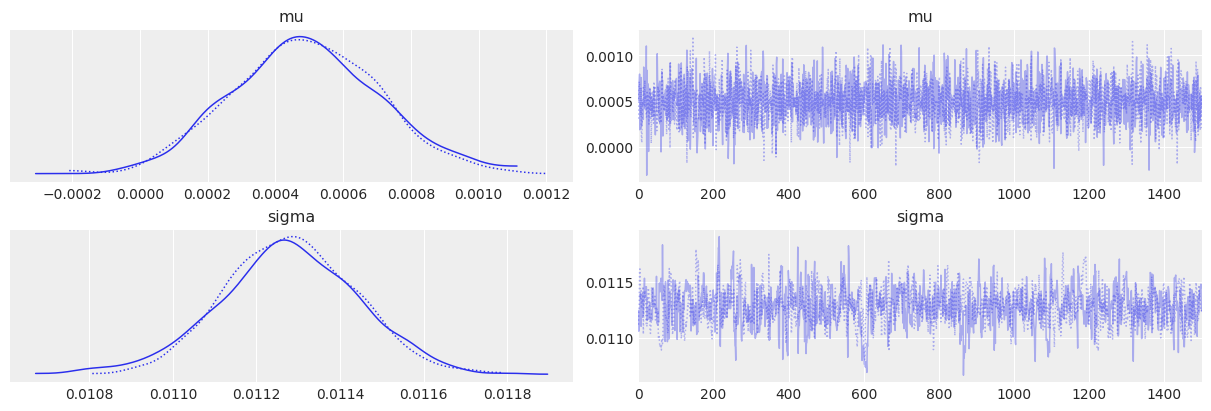

In [216]:
az.plot_trace(trace_normal);

In [175]:
with normal:
    pm.sample_posterior_predictive(trace_normal, extend_inferencedata=True)

Sampling: [returns]


Output()

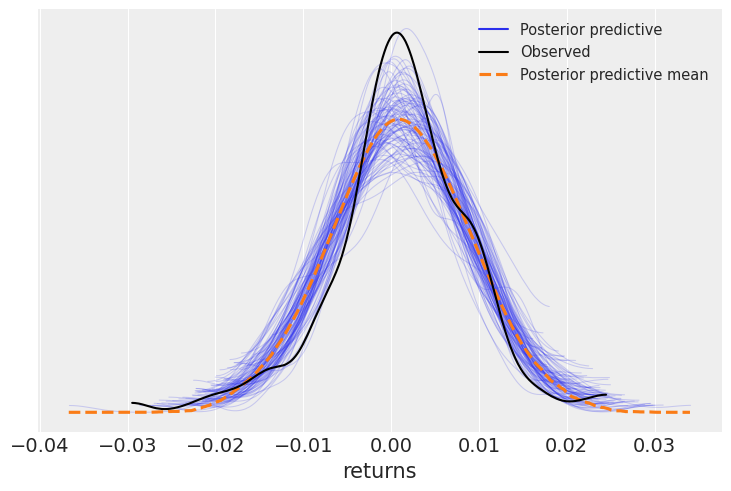

In [176]:
az.plot_ppc(trace_normal, num_pp_samples=100);

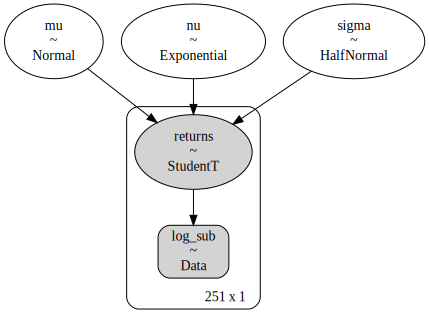

In [200]:
with pm.Model() as t:
    log_sub_data = pm.Data('log_sub', log_sub)

    nu = pm.Exponential('nu', lam=1/30)
    mu = pm.Normal('mu', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    returns = pm.StudentT('returns', nu=nu, mu=mu, sigma=sigma, observed=log_sub_data)

pm.model_to_graphviz(t)

In [201]:
with t:
    trace_t = pm.sample(
        draws=1500,
        tune=200,
        cores=2,
        chains=2,
        nuts_sampler='numpyro'
    )

  0%|          | 0/1700 [00:00<?, ?it/s]

  0%|          | 0/1700 [00:00<?, ?it/s]

We recommend running at least 4 chains for robust computation of convergence diagnostics


In [202]:
az.summary(trace_t)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.001,0.000,0.001,0.002,0.000,0.000,3132.0,2328.0,1.0
nu,7.808,7.923,2.534,15.227,0.474,0.335,394.0,405.0,1.0
sigma,0.006,0.001,0.005,0.007,0.000,0.000,449.0,689.0,1.0


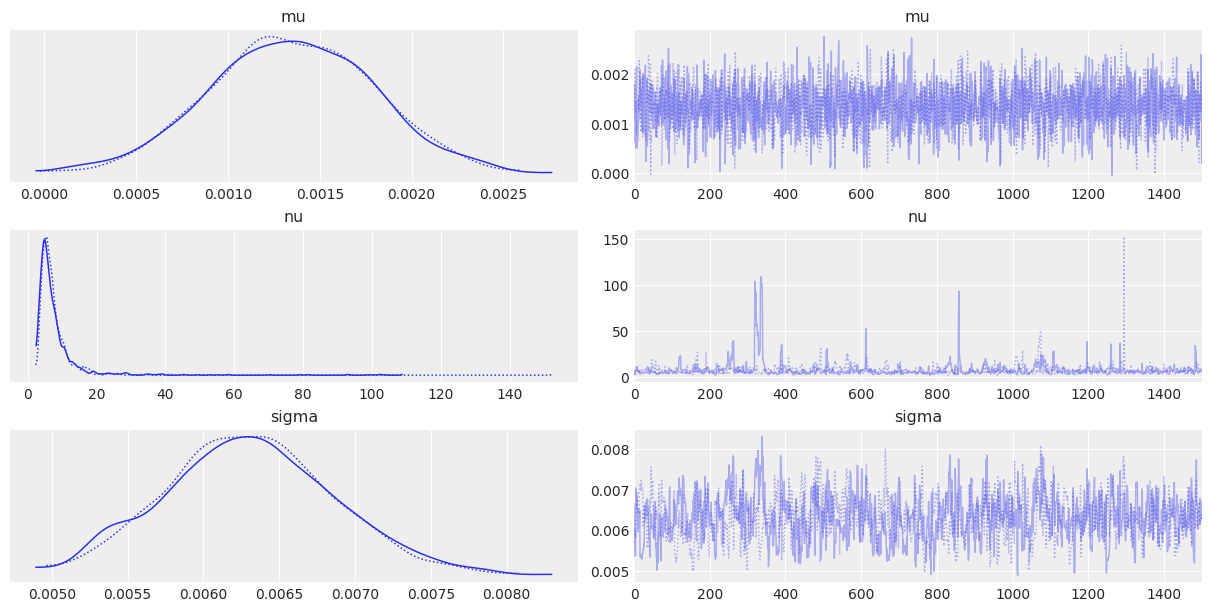

In [203]:
az.plot_trace(trace_t);

In [204]:
with t:
    pm.sample_posterior_predictive(trace_t, extend_inferencedata=True)

Sampling: [returns]


Output()

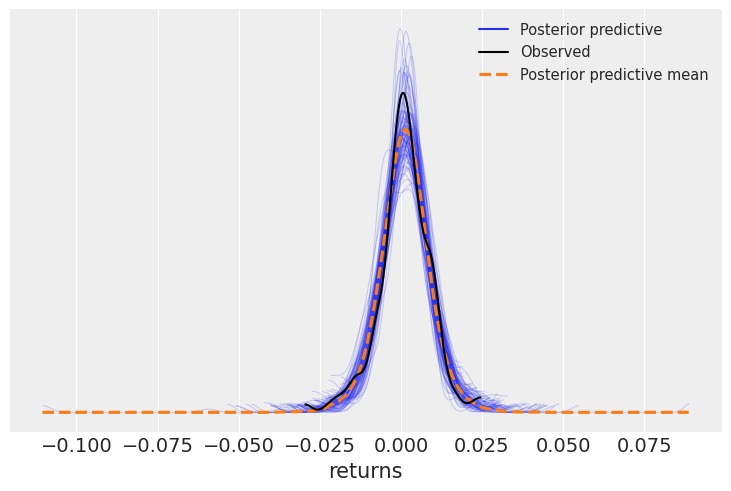

In [205]:
az.plot_ppc(trace_t, num_pp_samples=100);